# Housing Dataset for Week 1 Demo of UW Coursera ML Foundations

### Dataset - Housing data from UW Coursera - Seattle 

###### Load required packages 

In [18]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
from pandas.tools.plotting import scatter_matrix
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
sns.set_style('darkgrid')
%matplotlib inline

###### Load dataset 

In [2]:
housing_df=pd.read_csv('home_data.csv')

###### Inspect top 5 line items of data and data description 

In [3]:
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(4), int64(16), object(1)
memory usage: 3.5+ MB


###### Reset options to view all columns 

In [5]:
pd.set_option('display.max_columns',500)
housing_df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


###### Convert Date to DateTime format

In [6]:
housing_df.date=pd.to_datetime(housing_df.date,format='%Y%m%dT000000')
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


###### Model 1 - Single Predictor - sqft_living

In [7]:
# Visualize the scatter plot with x as sqft_living and y as price

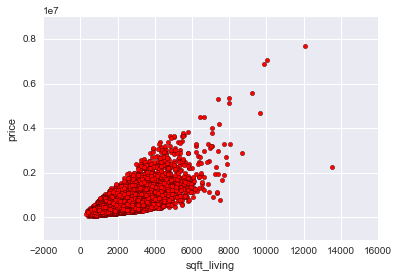

In [8]:
housing_df.plot.scatter(x='sqft_living',y='price',color='red')

In [9]:
# Fit a linear model to Model 1

In [10]:
train_data, test_data = train_test_split(housing_df, test_size=0.2, random_state=0)

X_train=train_data.sqft_living
X_train=X_train.reshape(-1,1)


y_train=train_data.price
y_train=y_train.reshape(-1,1)

lreg=linear_model.LinearRegression()
lreg.fit(X=X_train,y=y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

###### Get Max Error and MSE

In [11]:
X_test=test_data.sqft_living.reshape(-1,1)

y_test=test_data.price.reshape(-1,1)

y_pred=lreg.predict(X_test)

print("Max Error : %.2f" %np.max(np.absolute(y_pred-y_test)))
print
print("MSE Calculated: %.2f" %np.mean((y_pred-y_test)**2))
print("MSE Scikit-Learn: %.2f" %mean_squared_error(y_test,y_pred))
print
print("RMSE: %.2f" %np.sqrt(mean_squared_error(y_test,y_pred)))

Max Error : 3005746.34
MSE Calculated: 61940787221.50
MSE Scikit-Learn: 61940787221.50
RMSE: 248879.06


###### RMSE of about $248,879.06

###### Visualizing Predictions

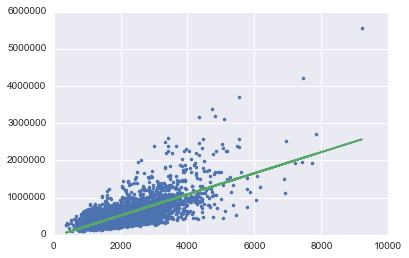

In [12]:
plt.plot(X_test,y_test, '.',
        X_test, y_pred,'-')

In [13]:
print(lreg.intercept_)
print(lreg.coef_)

[-48257.06345556]
[[ 283.96855737]]


###### Model 2 - Multiple Regression Model 

In [14]:
my_features=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [15]:
housing_df[my_features].describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,98077.939805
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,53.505026
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,98001.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,98033.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,98065.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,98118.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,98199.000000


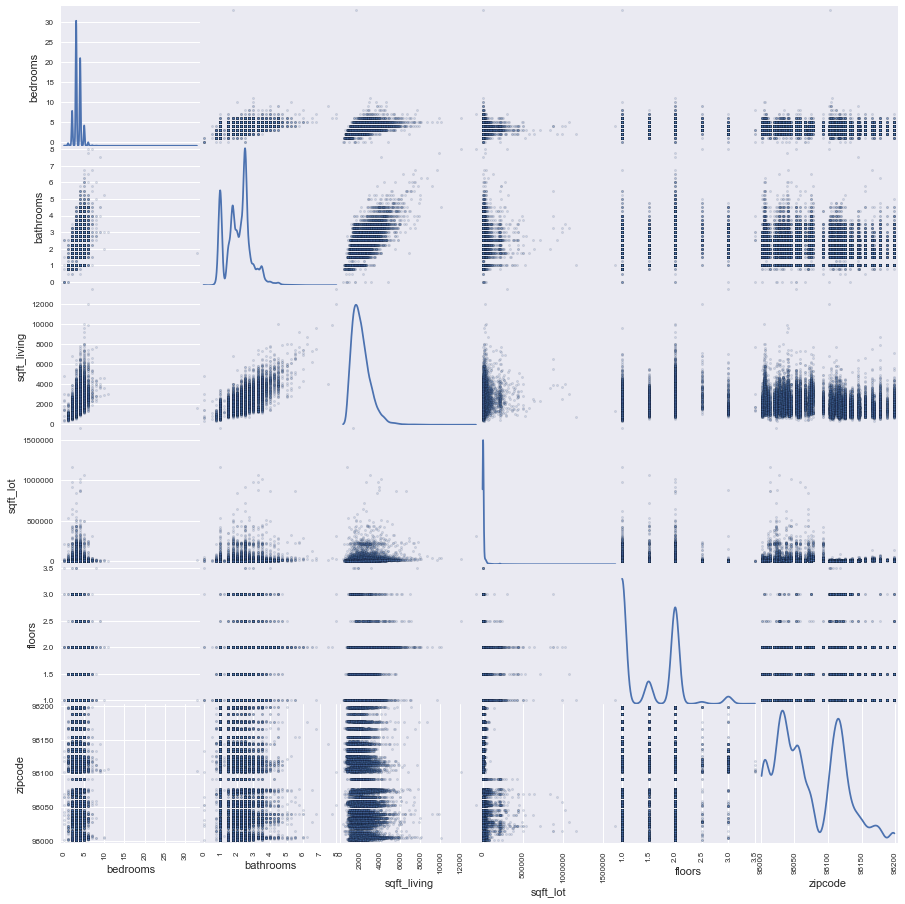

In [21]:
scatter_matrix(housing_df[my_features], alpha=0.2, figsize=(15,15), diagonal='kde');

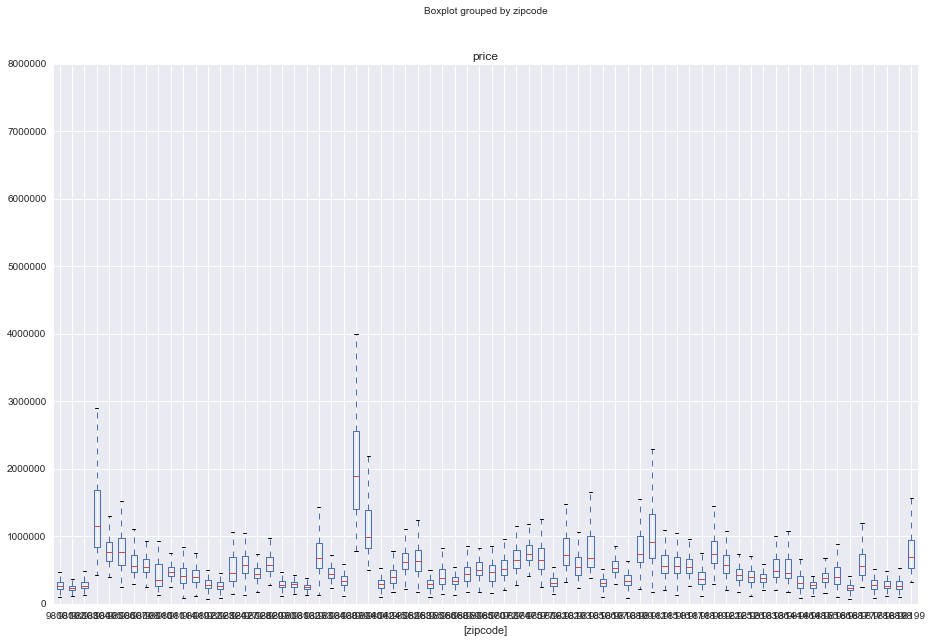

In [20]:
matplotlib.rcParams['figure.figsize']=(15.0,10.0)
housing_df[['price','zipcode']].boxplot(by='zipcode');

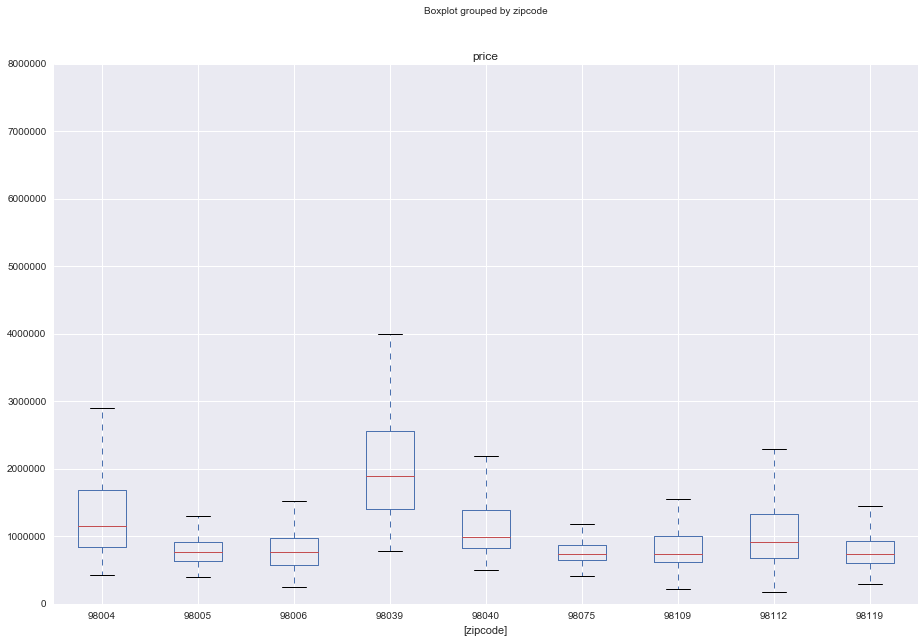

In [21]:
med=housing_df.groupby('zipcode')['price'].median()
med.sort_values(ascending=False, inplace=True)
housing_df_top=housing_df[[z in med.index[0:9] for z in housing_df.zipcode]]
housing_df_top[['price','zipcode']].boxplot(by='zipcode');

In [22]:
# Model 2 fit

X_train2=train_data[my_features]
X_train2=np.array(X_train2)

y_train2=train_data.price
y_train2=y_train2.reshape(-1,1)

lreg2=linear_model.LinearRegression()
lreg2.fit(X=X_train2, y=y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
X_test2=test_data[my_features]
X_test2=np.array(X_test2)

y_test2=test_data.price
y_test2=y_test2.reshape(-1,1)

y_pred2=lreg2.predict(X_test2)

#Max Error

print("Max_Error : %.2f" %np.max(np.absolute(y_pred-y_test2)))
print("RMSE : %.2f" %np.sqrt(mean_squared_error(y_test2, y_pred2)))      

Max_Error : 3005746.34
RMSE : 244004.77
